### Custom datasets

In [1]:
#Importing PyTorch and setting up device agnostic code
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__

'2.0.0'

In [2]:
device

'cuda'

### GET DATA !!!!

Food 101 starts 101 different classes of food
we will start with 3 classes of food and %10 of all the images

It is generally a good idea to start small then increase the scale when necessary 

In [3]:
import requests 
import zipfile
from pathlib import Path

#Setup a path to the data folder
data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

#If the image folder doesn't exist , download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exists , skipping download")
else:
    print(f"{image_path} creating directory")
    image_path.mkdir(parents=True,exist_ok=True)

#Download pizza,steak and sushi
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data")
    f.write(request.content)

#Unzip the data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping data..")
    zip_ref.extractall(image_path)


data\pizza_steak_sushi directory already exists , skipping download
Unzipping data..


In [4]:
from helper_functions import walk_through_dir
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
#Setup train data and test data
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path is data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


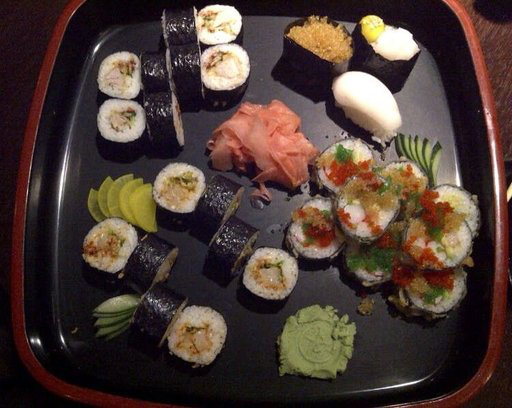

In [27]:
import random 
from PIL import Image

random.seed(42) 

#Get all the image paths
image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
print(random_image_path)
image_class=random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)

print(f"Random image path is {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'sushi')

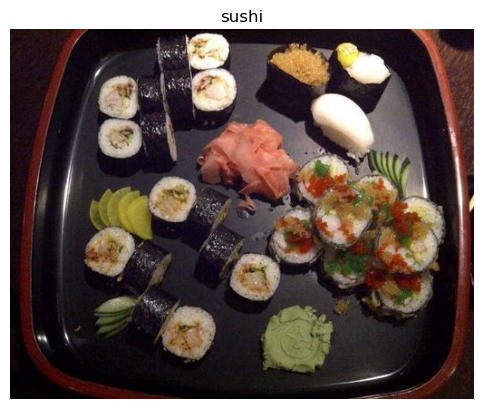

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(img)
plt.axis(False)
plt.title(image_class)
